Import requests to install tesseract

In [2]:
 # import requests to install tesseract

 import requests

In [3]:
d = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream=True)

with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:
  for block in d.iter_content(chunk_size=1024):
    if block:
      file.write(block)

In [5]:
# Install libraries for Optical Character Recognition:

! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Clearing Unimportant output:

from IPython.display import HTML, clear_output
clear_output()


In [6]:
! pip install pytesseract wand opencv-python
clear_output()

In [7]:
# Import required libraries:

from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

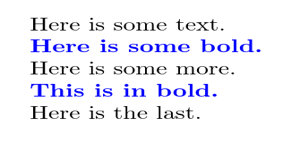

In [8]:
# Reading the image:

image = Image.open(requests.get('https://i.stack.imgur.com/d4c2B.png', stream=True).raw)
image = image.resize((300,150))
image.save('example.png')
image

In [9]:
# Extracting text with custom configuration:

custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config = custom_config)
print(text)

Here is some text.
Here is some bold.
Here is some more.
This is in bold.
Here is the last.



In [10]:
# To remove irrelevant symbols:

try:
  text = pytesseract.image_to_string(image, lang="eng")
  remove = "!()@—*“>+-/,'|£#%$&^_~"
  new = text
  for character in remove:
    new = new.replace(character,"")
  print(new)
except IOError as e:
  print("Error (%s)." %e)

Here is some text.
Here is some bold.
Here is some mor
This is in bold.
Here is the last.

 



In [11]:
# Using opencv:

image = cv2.imread('example.png')


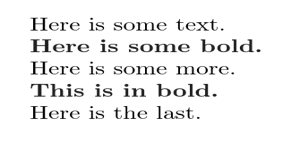

In [12]:
# Greyscale image:

def get_greyscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = get_greyscale(image)
Image.fromarray(gray_image)


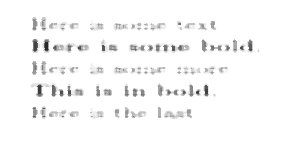

In [13]:
# Remove noise:

def noise_removal(image):
  return cv2.medianBlur(image,5)
noise = noise_removal(gray_image)
Image.fromarray(noise)


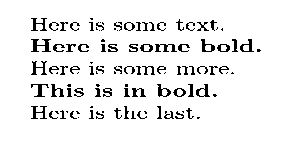

In [14]:
# Thresholding:

def threshold(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = threshold(gray_image)
Image.fromarray(thresh)

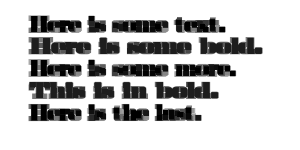

In [15]:
# Erosion:

def erosion(image):
  kernel = np.ones((5,5), np.uint8)
  return cv2.erode(image, kernel, iterations=1)
erode = erosion(gray_image)
Image.fromarray(erode)

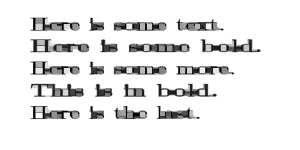

In [16]:
# Morphology:

def morph(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
morphimg = morph(gray_image)
Image.fromarray(morphimg)

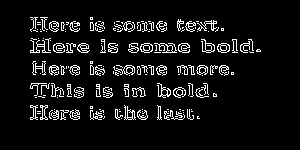

In [17]:
# Canny edge detection:

def canny(image):
    return cv2.Canny(image, 100, 200)
cannyimg = canny(gray_image)
Image.fromarray(cannyimg)

In [18]:
# Template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray_image, gray_image)
match

array([[1.]], dtype=float32)

As we are passing same image for matching we got the similarity of 100%.

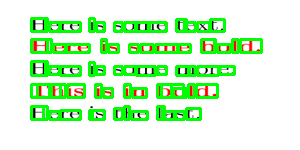

In [19]:
# Segregate every character in the text by creating a rectangle around it:

img = cv2.imread('example.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)